In [1]:
# Importing libraries that may be used

import numpy as np
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm

In [2]:
# Reading in the data from register 2

register_2 = pd.read_csv(r"/kaggle/input/coffee-sales/index_2.csv")

In [3]:
# Reading in the data from register 1

register_1 = pd.read_csv(r"/kaggle/input/coffee-sales/index_1.csv")

In [4]:
# Since the fields are the same for both datasets, combining the data from register 1 and register 2 into one dataframe so all the data is together

coffee_sales_combined = pd.concat([register_1, register_2])
coffee_sales_combined.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
# Grouping the 'coffee_name' field to see how many unique values there are and how many of each were sold

coffee_name_list = coffee_sales_combined.groupby(['coffee_name'])['coffee_name'].count()
coffee_name_list

coffee_name
Americano                     593
Americano with Milk           824
Americano with milk            44
Cappuccino                    517
Caramel                         1
Caramel coffee                  2
Caramel with Irish whiskey      8
Caramel with chocolate          4
Caramel with milk               3
Chocolate                       1
Chocolate with coffee           5
Chocolate with milk            12
Cocoa                         243
Coffee with Irish whiskey      16
Coffee with chocolate           1
Cortado                       292
Double Irish whiskey           12
Double chocolate                1
Double espresso                 1
Double espresso with milk       2
Double ristretto                1
Double vanilla                  2
Espresso                      152
Hot Chocolate                 282
Hot milkshake                   1
Irish whiskey                  21
Irish whiskey with milk        15
Irish with chocolate            5
Latte                         806
Mo

**Given the list of coffee names above, there are some values that are named differently but are the same item (example: 'Americano with Milk', and 'Americano with milk') which will be renamed so the item counts are combined. There are also numerous items that have very small amounts. For the sake of analyzing sales, it would be beneficial to group these items into broader categories based on commonality. My thought process for grouping these together will be shown in each line above the code in the next few lines. (Normally the person/business requesting the analysis would be consulted, but for this sample dataset I will be making grouping decisions using my own judgment.)**

In [6]:
# Any unique value in the 'coffee_name' field with 'Double' in the substring will be categorized as 'Espresso'

coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace(r'(?i).*double.*', 'Espresso', regex = True)

In [7]:
# There is one item called 'ristretto' that will be grouped in with espresso

coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace(r'(?i).*ristretto.*', 'Espresso', regex = True)

In [8]:
# There is one item called 'Cortado' that will be grouped in with espresso

coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace(r'(?i).*cortado.*', 'Espresso', regex = True)

In [9]:
# There is one item called 'Mochaccino' that will be grouped in with cappuccino drinks

coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace(r'(?i).*mochaccino.*', 'Cappuccino', regex = True)

In [10]:
# There is an item called 'Super chocolate' that will be grouped in with Cocoa
# There is an item called 'Hot chocolate' that will be grouped in with Cocoa

coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace(r'(?i).*super chocolate.*', 'Cocoa', regex = True)
coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace(r'(?i).*hot chocolate.*', 'Cocoa', regex = True)

In [11]:
#  Any unique value in the 'coffee_name' field with 'Americano' substring will be categorized as 'Americano'

coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace(r'(?i).*americano.*', 'Americano', regex = True)
coffee_sales_combined.groupby(['coffee_name'])['coffee_name'].count()

coffee_name
Americano                     1461
Cappuccino                     522
Caramel                          1
Caramel coffee                   2
Caramel with Irish whiskey       8
Caramel with chocolate           4
Caramel with milk                3
Chocolate                        1
Chocolate with coffee            5
Chocolate with milk             12
Cocoa                          531
Coffee with Irish whiskey       16
Coffee with chocolate            1
Espresso                       463
Hot milkshake                    1
Irish whiskey                   21
Irish whiskey with milk         15
Irish with chocolate             5
Latte                          806
Tea                             16
Vanilla coffee                   1
Vanilla with Irish whiskey       3
Name: coffee_name, dtype: int64

In [12]:
# Creating a dictionary to apply to the 'coffee_name' field using the str.replace method in the next line of code - this is to avoid processing these one at a time

renaming_values = {
    'Caramel': 'Caramel Coffee',
    'Irish': 'Irish Whiskey Coffee',
    'Vanilla': 'Vanilla Coffee',
    'Chocolate': 'Chocolate Coffee'
}

In [13]:
# There are several items that are flavored coffees (ex: Caramel, Caramel with vanilla, Irish whiskey with milk, etc.) Loop over the 'coffee_name' field and rename values using the
# dictionary above. Anything with 'Caramel' 

for old_item, new_item in renaming_values.items():
    coffee_sales_combined.loc[coffee_sales_combined['coffee_name'].str.startswith(old_item, na = False), 'coffee_name'] = new_item

coffee_sales_combined.groupby(['coffee_name'])['coffee_name'].count()

coffee_name
Americano                    1461
Cappuccino                    522
Caramel Coffee                 18
Chocolate Coffee               18
Cocoa                         531
Coffee with Irish whiskey      16
Coffee with chocolate           1
Espresso                      463
Hot milkshake                   1
Irish Whiskey Coffee           41
Latte                         806
Tea                            16
Vanilla Coffee                  4
Name: coffee_name, dtype: int64

In [14]:
# We can still see some values for flavored coffees that have a different naming convention: 'Coffee with chocolate', 'Coffee with Irish whiskey' that need to be renamed.
# Create a funtion that will identify those values and rename them so they match the categories created in the previous step

def rename_coffee(name):
    if name.startswith('Coffee with '):
        flavor = name[len('Coffee with '):]
        return f'{flavor} coffee'
    return name

In [15]:
# Apply the function created above to the 'coffee_name' field and rename the Irish Whiskey flavor to match naming convention above

coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].apply(rename_coffee)
coffee_sales_combined.groupby(['coffee_name'])['coffee_name'].count()

coffee_name
Americano               1461
Cappuccino               522
Caramel Coffee            18
Chocolate Coffee          18
Cocoa                    531
Espresso                 463
Hot milkshake              1
Irish Whiskey Coffee      41
Irish whiskey coffee      16
Latte                    806
Tea                       16
Vanilla Coffee             4
chocolate coffee           1
Name: coffee_name, dtype: int64

In [16]:
# One last renaming step for 'Irish whiskey Coffee' and 'chocolate coffee' can be done so they are all under the same value string

coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace('Irish whiskey coffee', 'Irish Whiskey Coffee')
coffee_sales_combined['coffee_name'] = coffee_sales_combined['coffee_name'].str.replace('chocolate coffee', 'Chocolate Coffee')

**Now that the values in coffee_names have been grouped, we can see what our updated list looks like.**

In [17]:
quantity_by_coffee = coffee_sales_combined.groupby(['coffee_name'])['coffee_name'].count()
quantity_by_coffee = quantity_by_coffee.sort_values(ascending = False)
quantity_by_coffee

coffee_name
Americano               1461
Latte                    806
Cocoa                    531
Cappuccino               522
Espresso                 463
Irish Whiskey Coffee      57
Chocolate Coffee          19
Caramel Coffee            18
Tea                       16
Vanilla Coffee             4
Hot milkshake              1
Name: coffee_name, dtype: int64

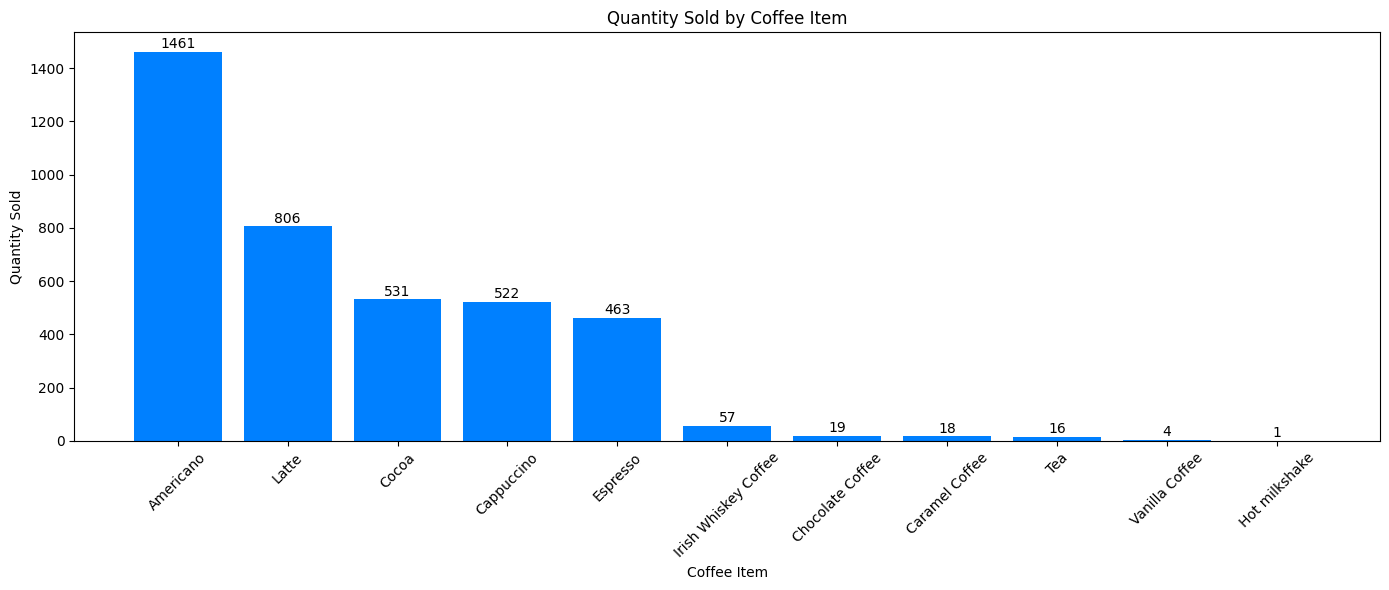

In [18]:
# Using the above list of quantity sold by coffee item, create a bar chart showing quantity of items sold - arranged highest left, lowest right

plt.subplots(figsize=(14, 6))
bars = plt.bar(quantity_by_coffee.index, quantity_by_coffee.values, color = '#0080FF')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f'{int(height)}',
        ha = 'center', va = 'bottom', fontsize = 10
    )

plt.xlabel('Coffee Item')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold by Coffee Item')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [19]:
# The 'money' column is in Ukranian hryvnias. Create a column showing the USD conversion of that value. The conversion rate is 0.24 USD for 1 Ukranian hryvnia
# Doing this since USD is more familiar to me, but would keep this as hryvnia if the person/company requesting analysis wanted that

coffee_sales_combined['USD'] = (coffee_sales_combined['money'] * .024).round(2)

In [20]:
# Create a dataframe of sales in USD for each item under coffee_name and sort it by descending USD total for making a bar chart in the next step

cs_item_sales = coffee_sales_combined.groupby(['coffee_name'])['USD'].sum()
cs_item_sales = cs_item_sales.sort_values(ascending = False)
cs_item_sales

coffee_name
Americano               1001.95
Latte                    689.54
Cocoa                    457.49
Cappuccino               449.19
Espresso                 269.31
Irish Whiskey Coffee      36.80
Chocolate Coffee          12.67
Caramel Coffee            11.71
Tea                        5.76
Vanilla Coffee             2.66
Hot milkshake              0.72
Name: USD, dtype: float64

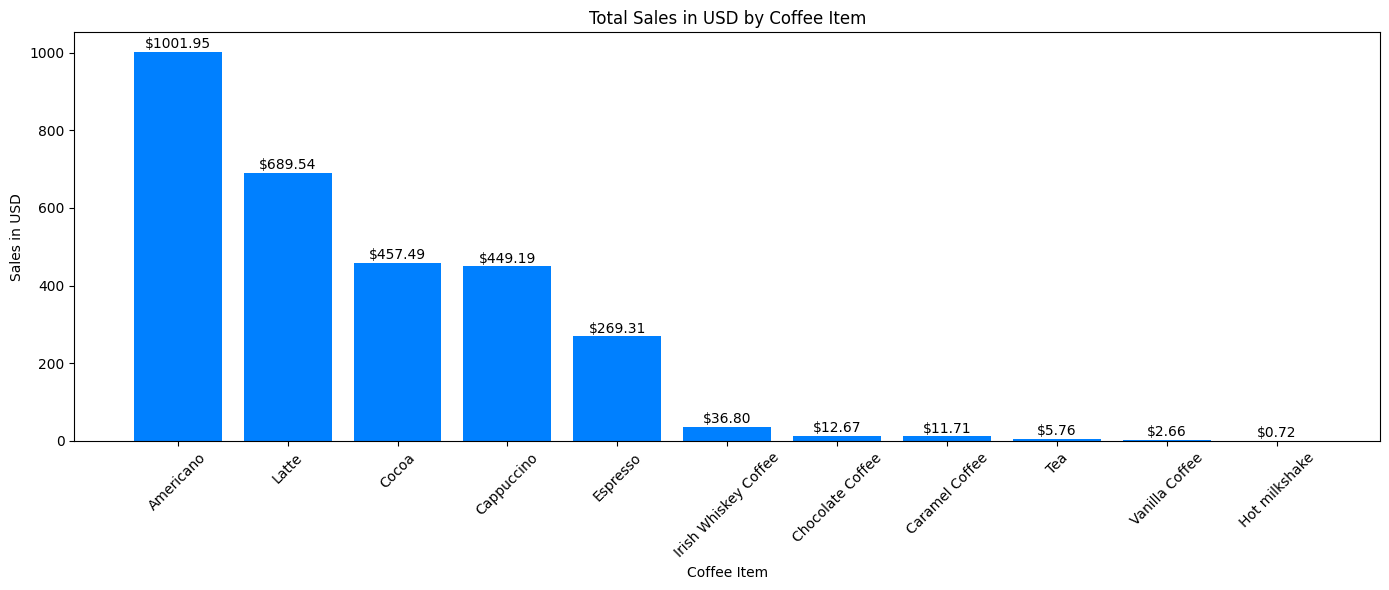

In [21]:
# Using the above sum of USD sales by item, create a bar chart of coffee item sales - arranged highest left, lowest right

plt.subplots(figsize=(14, 6))
bars = plt.bar(cs_item_sales.index, cs_item_sales.values, color = '#0080FF')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f'${height:.2f}',
        ha = 'center', va = 'bottom', fontsize = 10
    )

plt.xlabel('Coffee Item')
plt.ylabel('Sales in USD')
plt.title('Total Sales in USD by Coffee Item')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [22]:
# Converting the datetime column to date values in MM-DD-YYYY format for analyzing sales and items sold by month

coffee_sales_combined['datetime'] = pd.to_datetime(coffee_sales_combined['datetime'], format = 'mixed', errors = 'coerce')
coffee_sales_combined['datetime'] = coffee_sales_combined['datetime'].dt.strftime('%m-%d-%Y')
coffee_sales_combined.head()

,date,datetime,cash_type,card,money,coffee_name,USD
0,2024-03-01,03-01-2024,card,ANON-0000-0000-0001,38.7,Latte,0.93
1,2024-03-01,03-01-2024,card,ANON-0000-0000-0002,38.7,Cocoa,0.93
2,2024-03-01,03-01-2024,card,ANON-0000-0000-0002,38.7,Cocoa,0.93
3,2024-03-01,03-01-2024,card,ANON-0000-0000-0003,28.9,Americano,0.69
4,2024-03-01,03-01-2024,card,ANON-0000-0000-0004,38.7,Latte,0.93


In [23]:
# Checking to see what the earliest and latest dates in the dataset are

print(coffee_sales_combined['date'].min())
print(coffee_sales_combined['date'].max())

2024-03-01
2025-03-23


In [24]:
# Create a 'Month/Year' column for visualizing sales/items sold month over month

coffee_sales_combined['Month/Year'] = pd.to_datetime(coffee_sales_combined['datetime'], format = 'mixed', errors = 'coerce')
coffee_sales_combined['Month/Year'] = coffee_sales_combined['Month/Year'].dt.strftime('%m/%Y')
coffee_sales_combined.head()

,date,datetime,cash_type,card,money,coffee_name,USD,Month/Year
0,2024-03-01,03-01-2024,card,ANON-0000-0000-0001,38.7,Latte,0.93,03/2024
1,2024-03-01,03-01-2024,card,ANON-0000-0000-0002,38.7,Cocoa,0.93,03/2024
2,2024-03-01,03-01-2024,card,ANON-0000-0000-0002,38.7,Cocoa,0.93,03/2024
3,2024-03-01,03-01-2024,card,ANON-0000-0000-0003,28.9,Americano,0.69,03/2024
4,2024-03-01,03-01-2024,card,ANON-0000-0000-0004,38.7,Latte,0.93,03/2024


In [25]:
# Creating a new dataframe grouping Month/Year by USD and resetting index to be able to format the Month/Year column as a date to sort chronologically

sales_by_month_yr = coffee_sales_combined.groupby(['Month/Year'])['USD'].sum()
sales_by_month_yr = sales_by_month_yr.reset_index()

In [26]:
# Converting the Month/Year column to datetime to sort chronologically, then converting it back to string format after sorting

sales_by_month_yr['Month/Year'] = pd.to_datetime(sales_by_month_yr['Month/Year'], format = '%m/%Y')
sales_by_month_yr = sales_by_month_yr.sort_values('Month/Year')
sales_by_month_yr['Month/Year'] = sales_by_month_yr['Month/Year'].dt.strftime('%m/%Y')
sales_by_month_yr = sales_by_month_yr.rename(columns={'USD': 'Sales in USD'})
sales_by_month_yr

,Month/Year,Sales in USD
2,03/2024,169.08
4,04/2024,161.40
5,05/2024,218.31
6,06/2024,186.89
7,07/2024,166.11
8,08/2024,182.72
9,09/2024,239.82
10,10/2024,333.60
11,11/2024,206.33
12,12/2024,197.78


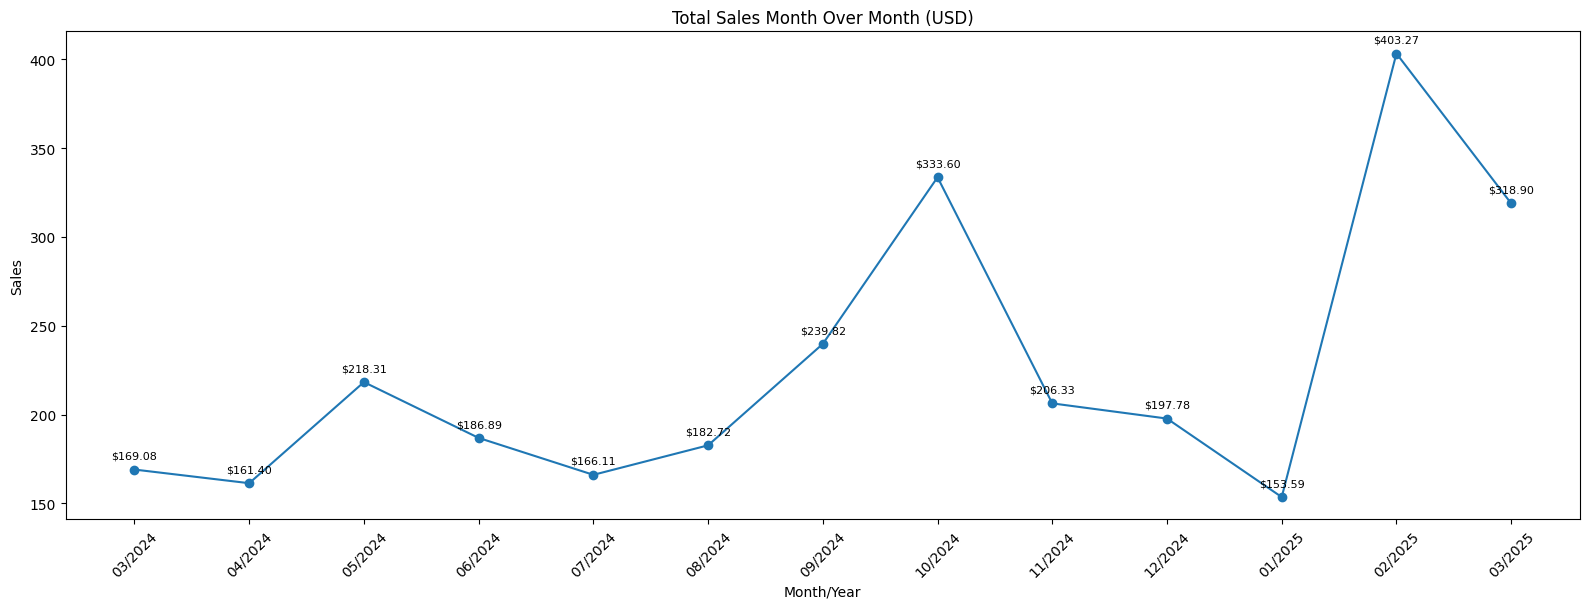

In [27]:
# Create line chart of month over month by total sales in USD

plt.figure(figsize = (16, 6.2))
plt.plot(sales_by_month_yr['Month/Year'], sales_by_month_yr['Sales in USD'], marker = 'o', linestyle = '-')

for x, y in zip(sales_by_month_yr['Month/Year'], sales_by_month_yr['Sales in USD']):
    plt.text(x, y + 5, f'${y:.2f}', ha = 'center', va = 'bottom', fontsize = 8)

plt.title('Total Sales Month Over Month (USD)')
plt.xlabel('Month/Year')
plt.ylabel('Sales')
#plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

In [28]:
# Creating a new dataframe grouping Month/Year by quantity sold and resetting index to be able to format the Month/Year column as a date to sort chronologically

quantity_by_month_yr = coffee_sales_combined.groupby(['Month/Year'])['coffee_name'].count()
quantity_by_month_yr = quantity_by_month_yr.reset_index()

In [29]:
# Converting the Month/Year column to datetime to sort chronologically, then converting it back to string format after sorting

quantity_by_month_yr['Month/Year'] = pd.to_datetime(quantity_by_month_yr['Month/Year'], format = '%m/%Y')
quantity_by_month_yr = quantity_by_month_yr.sort_values('Month/Year')
quantity_by_month_yr['Month/Year'] = quantity_by_month_yr['Month/Year'].dt.strftime('%m/%Y')
quantity_by_month_yr = quantity_by_month_yr.rename(columns={'coffee_name': 'Quantity Sold'})
quantity_by_month_yr

,Month/Year,Quantity Sold
2,03/2024,206
4,04/2024,196
5,05/2024,267
6,06/2024,227
7,07/2024,237
8,08/2024,272
9,09/2024,344
10,10/2024,426
11,11/2024,259
12,12/2024,259


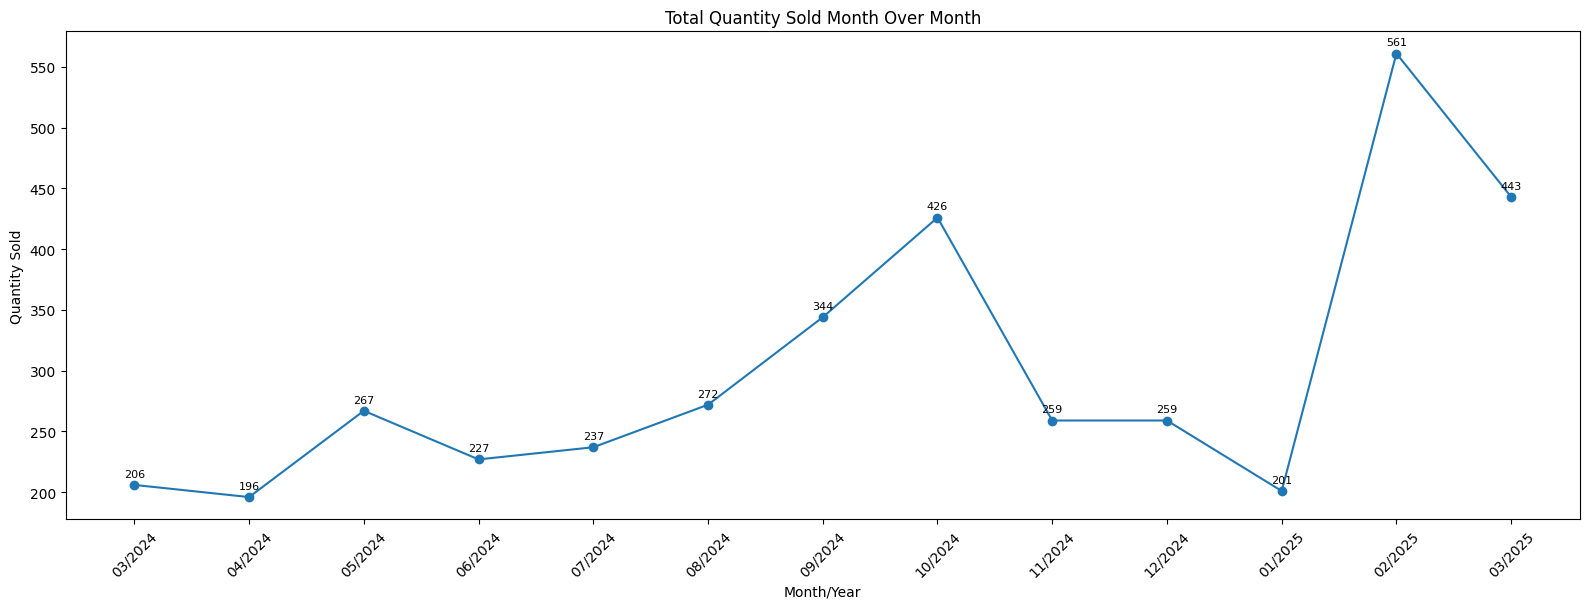

In [30]:
# Create a line chart to show total quantity sold month over month

plt.figure(figsize = (16, 6.2))
plt.plot(quantity_by_month_yr['Month/Year'], quantity_by_month_yr['Quantity Sold'], marker = 'o', linestyle = '-')

for x, y in zip(quantity_by_month_yr['Month/Year'], quantity_by_month_yr['Quantity Sold']):
    plt.text(x, y + 5, f'{int(y)}', ha = 'center', va = 'bottom', fontsize = 8)

plt.title('Total Quantity Sold Month Over Month')
plt.xlabel('Month/Year')
plt.ylabel('Quantity Sold')
#plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

In [31]:
# Create a data frame showing number of items sold by item and month/year

item_by_month_yr = coffee_sales_combined.groupby(['Month/Year', 'coffee_name'])['coffee_name'].count()
item_by_month_yr = item_by_month_yr.reset_index(name = 'Number Sold')
item_by_month_yr = item_by_month_yr.sort_values('Month/Year', ascending = False)
item_by_month_yr = item_by_month_yr.rename(columns={'coffee_name': 'Item Name'})
item_by_month_yr

,Month/Year,Item Name,Number Sold
75,12/2024,Latte,47
74,12/2024,Espresso,43
73,12/2024,Cocoa,47
72,12/2024,Cappuccino,38
71,12/2024,Americano,84
...,...,...,...
3,01/2025,Espresso,27
2,01/2025,Cocoa,29
1,01/2025,Cappuccino,27
4,01/2025,Latte,41


In [46]:
# Pivot the item_by_month_yr dataframe to be able to make a line chart showing number of items sold month over month with a line for each item

item_by_month_yr['Month/Year'] = pd.to_datetime(item_by_month_yr['Month/Year'], format='%m/%Y')
pivot_item_month_yr = item_by_month_yr.pivot(index='Month/Year', columns='Item Name', values='Number Sold')
pivot_item_month_yr = pivot_item_month_yr.sort_index(ascending=True)
pivot_item_month_yr = pivot_item_month_yr.fillna(0).astype(int)
pivot_item_month_yr.index = pivot_item_month_yr.index.strftime('%m/%Y')
pivot_item_month_yr

Item Name,Americano,Cappuccino,Caramel Coffee,Chocolate Coffee,Cocoa,Espresso,Hot milkshake,Irish Whiskey Coffee,Latte,Tea,Vanilla Coffee
Month/Year,,,,,,,,,,,
03/2024,70,20,0,0,28,40,0,0,48,0,0
04/2024,77,43,0,0,19,26,0,0,31,0,0
05/2024,106,55,0,0,23,25,0,0,58,0,0
06/2024,83,46,0,0,19,29,0,0,50,0,0
07/2024,101,32,0,0,20,28,0,0,56,0,0
08/2024,109,34,0,0,17,54,0,0,58,0,0
09/2024,136,41,0,0,20,53,0,0,94,0,0
10/2024,126,44,0,0,90,46,0,0,120,0,0
11/2024,77,26,0,0,72,16,0,0,68,0,0


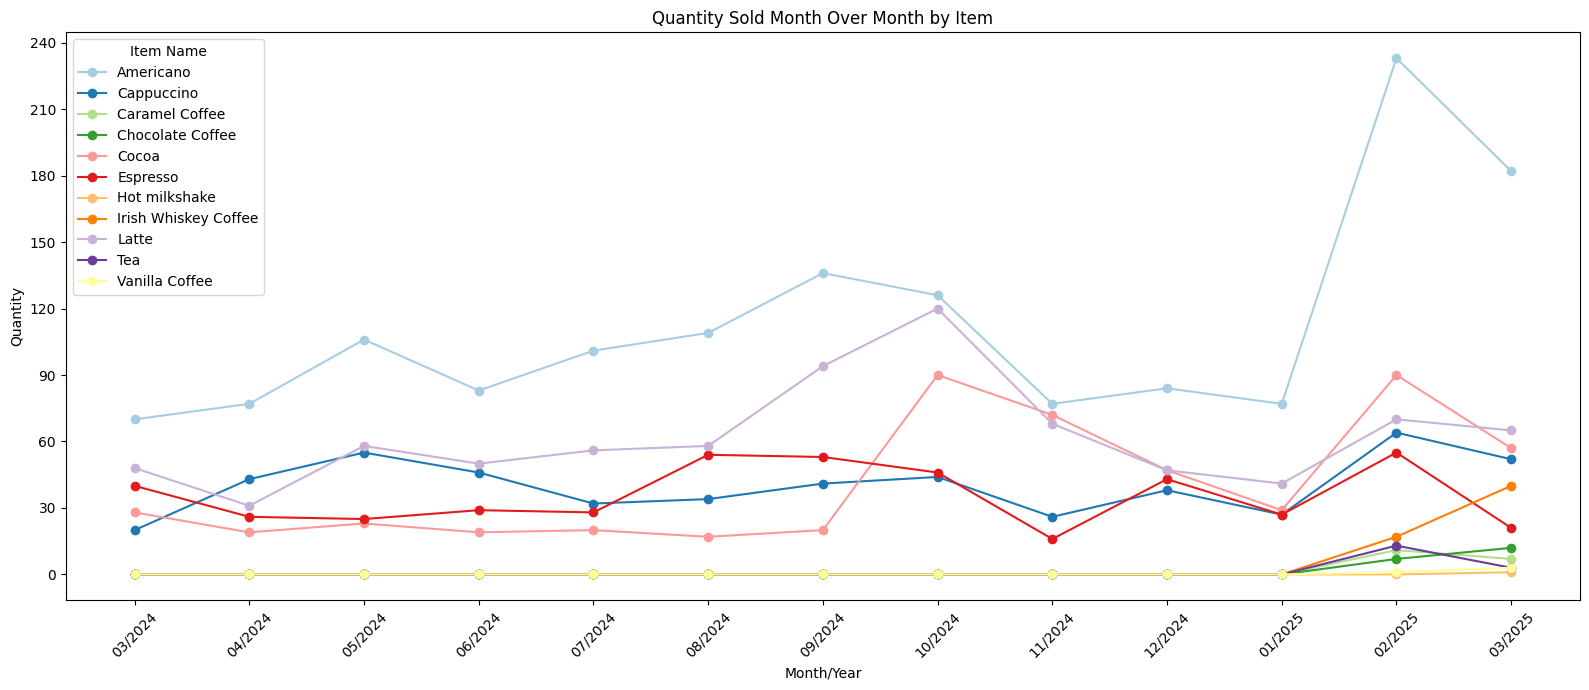

In [47]:
# Create a line chart showing number of items sold month over month

color_palette = plt.get_cmap('Paired')

fig, ax = plt.subplots(figsize=(16, 7))

# for line in ax.get_lines():
#     item_name = line.get_label()
#     x_data = line.get_xdata()
#     y_data = line.get_ydata()
#     for x, y in zip(x_data, y_data):
#         ax.text(x, y + 1, str(int(y)), fontsize = 8, ha = 'center', va = 'bottom')

for i, column in enumerate(pivot_item_month_yr.columns):
    ax.plot(pivot_item_month_yr.index, pivot_item_month_yr[column], marker = 'o', label = column, color = color_palette(i))

ax.set_title('Quantity Sold Month Over Month by Item')
ax.set_xlabel('Month/Year')
ax.set_ylabel('Quantity')
ax.yaxis.set_major_locator(mtick.MaxNLocator(integer = True))
ax.legend(title = 'Item Name')
plt.xticks(rotation = 45)
plt.grid(False)
plt.tight_layout()
plt.show()